# Episode 05-c: Scoping of Proofs of concepts - Constraint Programming

TODO

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [2]:
from episode04.board import BoardMark
from episode04.gameengine import SolvedNonoGameEngine
from episode04.puzzle import Puzzle
from episode04.samples import clues2x2, clues5x5s, solution2x2, solution5x5s

import numpy as np

In [3]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [4]:
solution2x2

array([[1, 0],
       [1, 1]])

Now, let's loop over the problem space

# 4. Programming with constraints

Wikipedia defines constraint Programming as following: 

>    Constraint programming is a paradigm for solving combinatorial problems that draws on a wide range of techniques from artificial intelligence, computer science, and operations research. In constraint programming, users declaratively state the constraints on the feasible solutions for a set of decision variables. Constraints differ from the common primitives of imperative programming languages in that they do not specify a step or sequence of steps to execute, but rather the properties of a solution to be found. In addition to constraints, users also need to specify a method to solve these constraints. This typically draws upon standard methods like chronological backtracking and constraint propagation, but may use customized code like a problem specific branching heuristic. 

Python-contraint offers solvers for Constraint Satisfaction Problems (CSPs) over finite domains in simple and pure Python. CSP is class of problems which may be represented in terms of variables (a, b, …), domains (a in [1, 2, 3], …), and constraints (a < b, …).

https://pypi.org/project/python-constraint/


Alternative (TODO)

In [5]:
! pip install python-constraint

In [6]:
from constraint import Problem

## 4.1. Basic example from the tutorial

This example shows how to define a and b, a being in the range 1,2,3 and b in the range 4,5,6 so b is 2 time a.

In [7]:
problem = Problem()
problem.addVariable("a", [1,2,3])
problem.addVariable("b", [4,5,6])
problem.getSolutions()

[{'a': 3, 'b': 6},
 {'a': 3, 'b': 5},
 {'a': 3, 'b': 4},
 {'a': 2, 'b': 6},
 {'a': 2, 'b': 5},
 {'a': 2, 'b': 4},
 {'a': 1, 'b': 6},
 {'a': 1, 'b': 5},
 {'a': 1, 'b': 4}]

Without constraints it does a cartesian product of variables a and b. The result is all possible combinations of a and b.

The constraint force to filter only pairs where b is twice a. It can be implemented as a lambda function.

In [8]:
problem.addConstraint(lambda a, b: a*2 == b,
                          ("a", "b"))
problem.getSolutions()

[{'a': 3, 'b': 6}, {'a': 2, 'b': 4}]

## 4.2. Application to the monogram problem

In [9]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2)

In [10]:
# solve the problem for a 2x2 board
problem = Problem()

# create a variable for each cell
# name is rNcM where N is the row number and M the col number
# they all are in range 0-1
problem.addVariable("r0c0", [0,1])
problem.addVariable("r0c1", [0,1])
problem.addVariable("r1c0", [0,1])
problem.addVariable("r1c1", [0,1])
problem.getSolutions()

[{'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 1, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 1, 'r1c0': 0, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 1, 'r1c1': 0},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 1},
 {'r0c0': 0, 'r0c1': 0, 'r1c0': 0, 'r1c1': 0}]

In [11]:
# express the clues as contraints in a static way
# last parameter is the given variables. They match the lambda vars.
# contraints on rows
problem.addConstraint(lambda c0, c1: c0+c1 == 1,
                          ("r0c0", "r0c1"))
problem.addConstraint(lambda c0, c1: c0+c1 == 2,
                          ("r1c0", "r1c1"))
# contraints on cols
problem.addConstraint(lambda r0, r1: r0+r1 == 2,
                          ("r0c0", "r1c0"))
problem.addConstraint(lambda r0, r1: r0+r1 == 1,
                          ("r0c1", "r1c1"))
solutions = problem.getSolutions()
solutions

[{'r0c0': 1, 'r0c1': 0, 'r1c0': 1, 'r1c1': 1}]

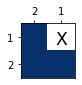

True

In [12]:
# update the board with solution
game2x2.play(0,0, BoardMark(solutions[0]['r0c0']))
game2x2.play(0,1, BoardMark(solutions[0]['r0c1']))
game2x2.play(1,0, BoardMark(solutions[0]['r1c0']))
game2x2.play(1,1, BoardMark(solutions[0]['r1c1']))

game2x2.show()
game2x2.is_solved()

## 4.3. Wrap up

What works:
- problem is expressed clearly
- documentation in clean and a totorial is provided. It took me a while to understand what is going on with variables and it is still unclear to me how to use built-in function

Limitation:
- As it seems to compute all the combinations, it may run into the same limitations than brute foree. To be tested
- Generalisation to any size and split blocks is more challenging. It does not hava a notion of an array. Each variable must be handled separatelly.  Interesting challenge!

Challenges for further prototyping
- generate variable names and contraints
- write contraints for variable size
- write contraints for split blocks

- Ideation: 30mn - classical paradigm 
- Design: 1h - feature out how to manage variables for board - lib was new to me
- Implementation: 2h - generic representation of rules - for whole POC - 5-6h